In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


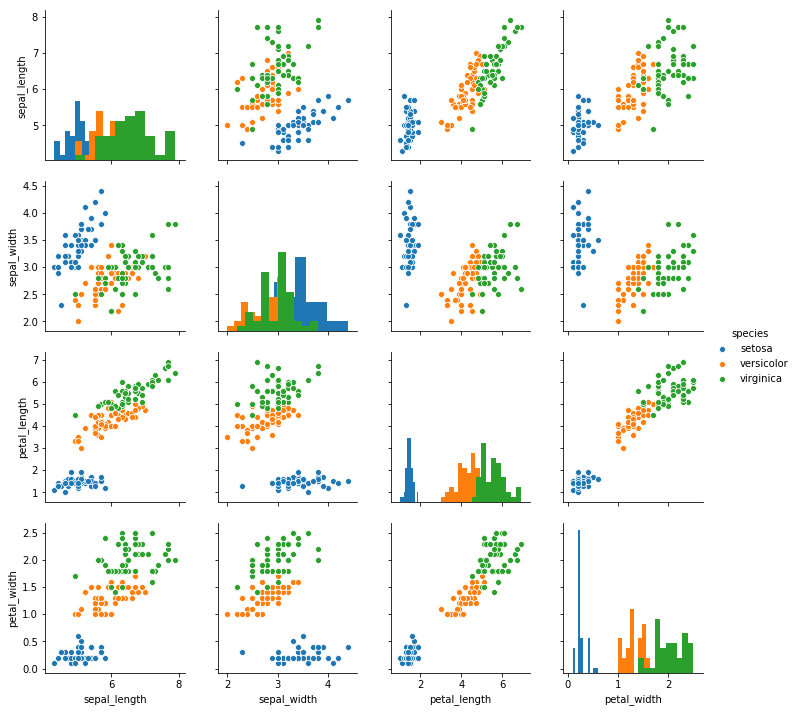

In [6]:
sns.pairplot(data=iris, hue='species', diag_kind='hist')

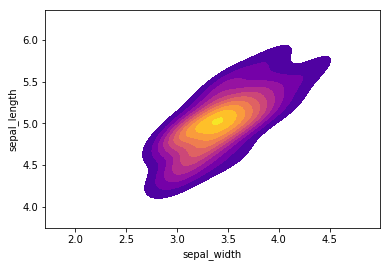

In [7]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X = iris.drop('species', axis=1)
y = iris['species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.svm import SVC

In [15]:
svc = SVC(gamma='auto')

In [16]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
preds = svc.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {'C': [0.1,10,100,1000], 'gamma': [0.1,0.001,0.0001]}

In [25]:
grid = GridSearchCV(SVC(), param_grid, verbose=3, refit=True, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8571428571428571, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...................... C=0.1, gamma=0.1, score=0.9, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...................... C=0.1, gamma=0.1, score=0.9, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...................... C=0.1, gamma=0.1, score=1.0, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8421052631578947, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.3333333333333333, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1000, gamma=0.001, score=0.95, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................... C=1000, gamma=0.001, score=0.9, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................... C=1000, gamma=0.001, score=1.0, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.9523809523809523, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .................. C=1000, gamma=0.0001, score=0.9, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .................. C=1000, gamma=0.0001, score=0.9, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 10, 100, 1000], 'gamma': [0.1, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [26]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
grid_predictions = grid.predict(X_test)

In [28]:
print(confusion_matrix(y_test, grid_predictions))
print('\n')
print(classification_report(y_test, grid_predictions))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

